In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv("E:/Company_Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data['ShelveLoc'] = pd.to_numeric(data['ShelveLoc'], errors='coerce')
data['Urban'] = pd.to_numeric(data['Urban'], errors='coerce')

In [8]:
data.isna().sum()

Sales            0
CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc      400
Age              0
Education        0
Urban          400
US               0
dtype: int64

In [10]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
del data['ShelveLoc']

In [13]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
Age              int64
Education        int64
Urban          float64
US              object
dtype: object

In [15]:
data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [16]:
# Complete Company dataset
label_encoder = preprocessing.LabelEncoder()
data['US'] = label_encoder.fit_transform(data['US'])

In [17]:
label_encoder = preprocessing.LabelEncoder()
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [18]:
data['US'].value_counts()

1    258
0    142
Name: US, dtype: int64

In [19]:
x = data.iloc[:,0:10]
y = data['US']

In [20]:
data['US'].unique()

array([1, 0])

In [21]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US']

In [22]:
# splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 40)

In [ ]:
#Building Decision Tree Classifier using Entropy Criteria

In [23]:
# for classification
model = DecisionTreeClassifier(criterion = 'entropy')
# if not mention criteria: entropy , by default it takes gini index
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

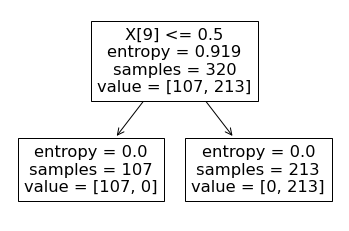

In [24]:
#PLot the decision tree
tree.plot_tree(model);

In [25]:
# Predicting on test data
preds = model.predict(x_test) #predicting on test dataset
pd.Series(preds).value_counts() # getting the count of each category

1    45
0    35
dtype: int64

In [26]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,0,1
US,,
0,35,0
1,0,45


In [27]:
# Accuracy
np.mean(preds == y_test)

1.0

In [ ]:
#Building Decision Tree classifier (CART) Using GINI criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier()

In [29]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [ ]:
#Decision Tree Regression Example

In [31]:
# for regrssion
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [32]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1
1,11.22,111,48,16,260,83,65,10,271,1
2,10.06,113,35,10,269,80,59,12,270,1
3,7.40,117,100,4,466,97,55,14,269,1
4,4.15,141,64,3,340,128,38,13,268,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,128,1
396,6.14,139,23,3,37,120,55,11,127,1
397,7.41,162,26,12,368,159,40,18,126,1
398,5.94,100,79,7,284,95,50,12,386,1


In [33]:
array = data.values
array

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   0.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  , 271.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  , 270.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  , 126.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  , 386.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  , 399.  ,   1.  ]])

In [35]:
array = data.values
X = array[:,0:9]
y = array[:,9]

In [37]:
# splitting data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state= 1)

In [39]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [42]:
model.score(X_train, Y_train)

1.0